# **Etapa 4: Visualización de datos**


## Objetivos:
Realizar la visualización de datos y análizar los resultados para observar si coinciden con nuestros análisis anteriores.


***


### Importación de librerias.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Tarea 1: Ejemplo


Primero importamos los datos.

In [62]:
#df=pd.read_csv("./dataset_part_2.csv")
#df
df= pd.read_csv("/content/drive/MyDrive/Copia de dataset_part_2.csv")


Dado que a estas alturas no hemos visto como visualizar datos (o quizás sí) vamos a poner un ejemplo de como realizar gráficas. Para ello utilizaremos la librería `seaborn` y `matplotlib`. En la siguiente gráfica representaremos la masa de las cargas `PayloadMass` respecto el número de vuelo `FlightNumber`. 


In [33]:
sns.catplot(y="PayloadMass", x="FlightNumber", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

ValueError: ignored

Parece ser que con el tiempo la masa ha ido aumentado, podemos deducir que los cohetes cada vez son más hábiles en el transporte. Pero podemos obtener mas información:

In [36]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

ValueError: ignored

Ahora podemos diferenciar aquellos que han sido un éxito y los que no. Podemos ver que los últimos vuelos, además de que tener transportar más carga han sido un éxito la mayoría, SpaceX esta en racha.

### Ejercicio 1: Visualiza la relación entre el número de vuelo y la plataforma de despegue.

Basándote en el código del ejemplo anterior visualiza la relación entre `FlightNumber` y `LaunchSite` utilizando la variable `Class` para el color. 

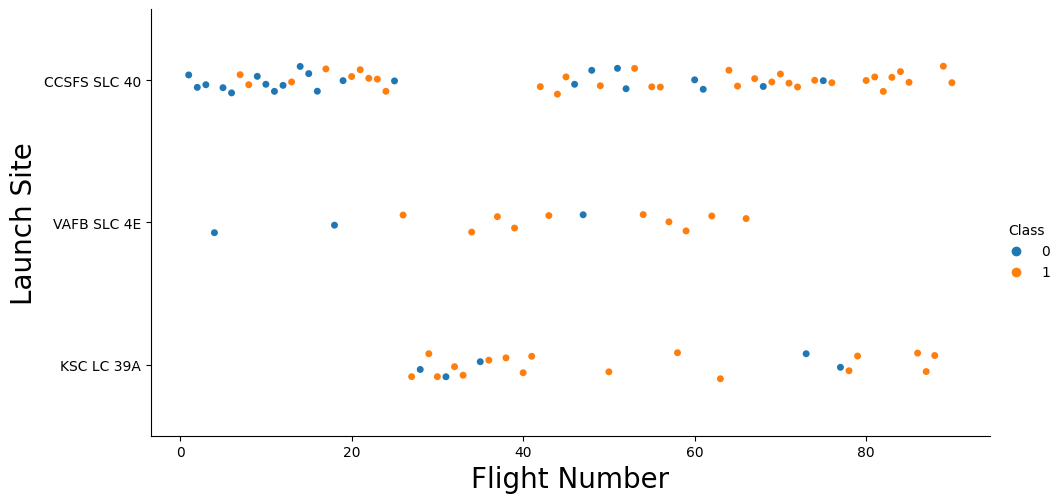

In [64]:
#INSERTA AQUÍ TU CÓDIGO

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class",data=df,aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


¿Ves algún patrón en los datos? Intenta elaborar tu respuesta.

### Ejercicio 2: Visualiza la relación entre masa de la carga y la plataforma

Basándote en el código del ejemplo anterior visualiza la relación entre `LaunchSite` y `PayloadMass` utilizando la variable `Class` para el color. 


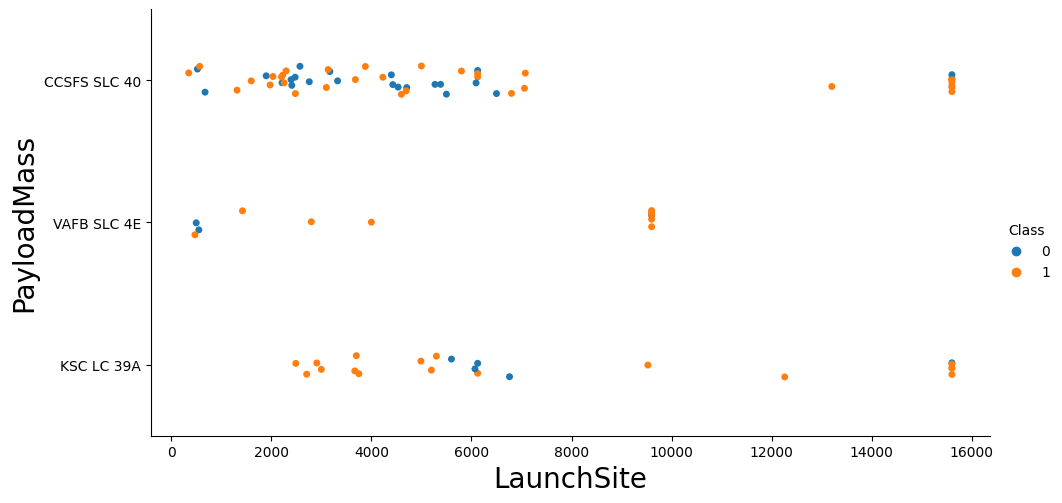

In [65]:
#INSERTA AQUÍ TU CÓDIGO
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class",data=df,aspect = 2)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

¿Ves algún patrón en los datos? Intenta elaborar tu respuesta.

### Ejercicio  3: Visualiza la relación entre número de vuelos y órbita


Basándote en el código del ejemplo anterior visualiza la relación entre `FlightNumber` y `Orbit` utilizando la variable `Class` para el color. 

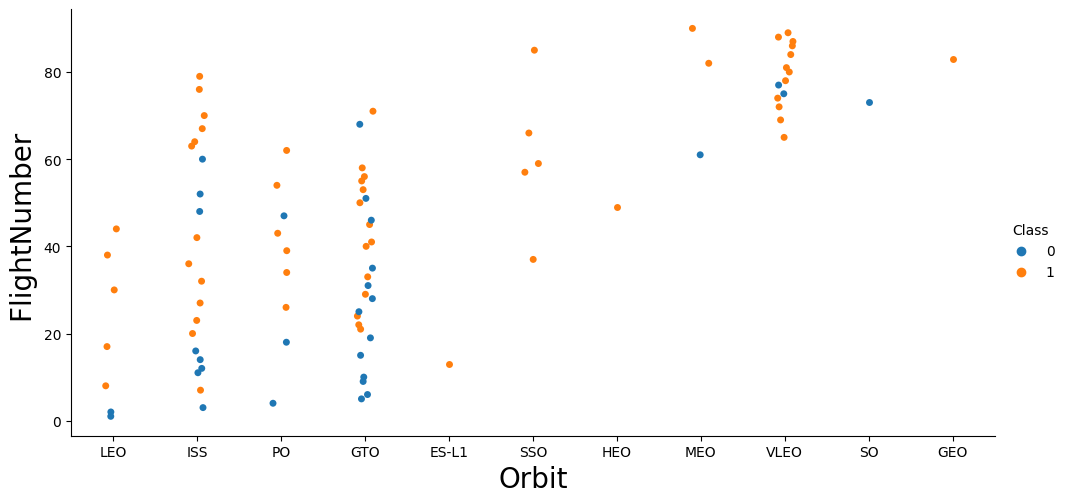

In [66]:
#INSERTA AQUÍ TU CÓDIGO
sns.catplot(y="FlightNumber", x="Orbit", hue="Class",data=df,aspect = 2)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber ",fontsize=20)
plt.show()

¿Ves algún patrón en los datos? Intenta elaborar tu respuesta.


### Ejercicio  4: Visualiza la relación entre órbita y masa de la carga


Basándote en el código del ejemplo anterior visualiza la relación entre `PayloadMass` y `Orbit` utilizando la variable `Class` para el color. 

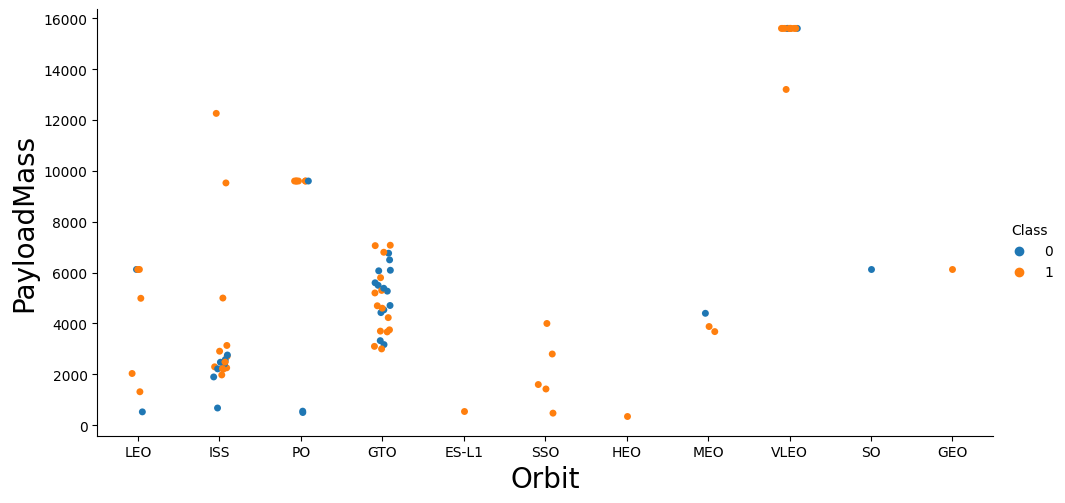

In [68]:
#INSERTA AQUÍ TU CÓDIGO
sns.catplot(y="PayloadMass", x="Orbit", hue="Class",data=df,aspect = 2)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

¿Ves algún patrón en los datos? Intenta elaborar tu respuesta.

### Ejemplo  2: Visualiza la proabilidad de éxito según la órbita 


Cuatro ejercicios iguales son suficientes, por lo que hagamos algo diferente. Vamos a crear un gráfico de barras que muestren los resultados obtenidos en el análisis exploratorio anterior. Hagamos un repaso:


Con `df.groupby('Orbit')` tenemos el datframe agrupado según las órbitas. Nos quedamos con la columna `Class` y calculamos el valor medio de esta columna para obtener las probabildiades de éxito según orbita.

In [71]:
df_groupby_orbits = df.groupby('Orbit')["Class"].mean()
df_groupby_orbits

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

Estos valores podemos ordenarlos con el método `.sort_values()`

In [70]:
df_groupby_orbits=df_groupby_orbits.sort_values()
df_groupby_orbits

NameError: ignored

Y ahora obtenemos una serie de pandas. Para poder realizar una gráfica necesitamos un dataframe por lo que aplicamos el método `.reset_index()`

In [ ]:
df_groupby_orbits=df_groupby_orbits.reset_index()

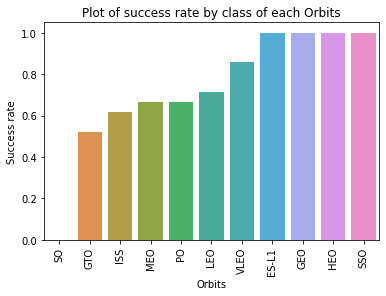

In [ ]:
ax = sns.barplot(x = 'Orbit', y = 'Class', data=df_groupby_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Success rate', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

A las personas les encantan los gráficos y creen la mayoría de lo que ven. Si mostrasemos el gráfico anterior a cualquier persona pensaría que los lanzamientos a la órbita SO han fallado siempre y fallarán siempre mientras que los lanzamientos a SSO nunca han fallado ni fallarán probablemente. Un poco lejos de la realidad. Deberíamos elminar aquellas órbitas con pocos lanzamientos y después tomar este tipo de decisiones.

### Ejercicio  5: Visualiza la proabilidad de éxito según la plataforma 


Agrupa los datos según la plataforma de lanzamiento y calcula la media de éxito. Llama a esta serie `df_groupby_ls`

In [73]:
#INSERTA AQUÍ TU CÓDIGO
df_groupby_LaunchSite=df_groupby_LaunchSite.sort_values()
df_groupby_ls

NameError: ignored

Ordenalos con el método `.sort_values()`

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


LaunchSite
CCSFS SLC 40    0.600000
VAFB SLC 4E     0.769231
KSC LC 39A      0.772727
Name: Class, dtype: float64

Y ahora obtenemos una serie de pandas. Para poder realizar una gráfica necesitamos un dataframe por lo que aplicamos el método `.reset_index()`

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


Realiza la gáfica:

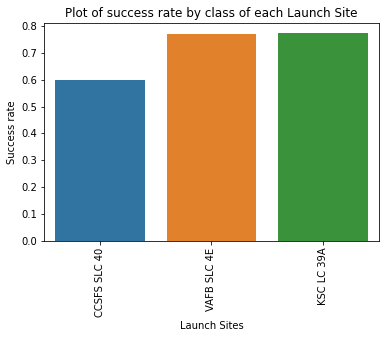

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


Comenta el gráfico anterior.

### Ejemplo 3: Visualizar la evolución de la carga con el tiempo



El último tipo de gráfico que vamos a ver es un gráfico de linea para visualizar series temporales. Vamos a comparar la masa de la carga con los años.

Primero, observemos que la fecha es completa, no solo el año, por lo que debemos crear una nueva columna con el año únicamente. Pandas tiene una función muy útil llamada DatetimeIndex que nos permite seleccionar el año como método de esta función. Veamoslo:


In [ ]:
pd.DatetimeIndex(df["Date"]).year

Int64Index([2010, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014,
            2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020],
           dtype='int64', name='Date')

Así pues, crear una nueva columna es sencillo:

In [75]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year

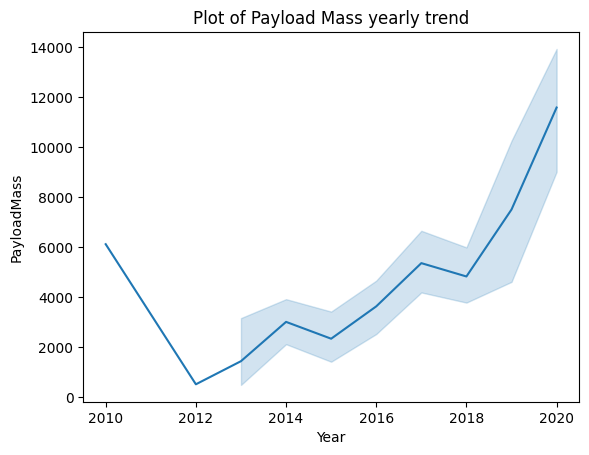

In [76]:
sns.lineplot(data=df, x='Year', y='PayloadMass')
plt.title('Plot of Payload Mass yearly trend');
plt.show()

Podemos observar que desde 2012 la masa transportada tiene una tendencia ascendente. En el gráfico se muestra la media como una linea de color oscuro, y un intervalo de confianza del 95% de color mas claro. Viendo este gráfico podemos afirmar que para cada año el 95% de los lanzamientos tenian un valor en ese intervalo. Esto se hace para evitar valores extremos en el gráfico.

### Ejercicio 6: Visualización de la probabilidad de éxito en cada mes.

Utiliza el ejemplo anterior para crear una nueva columna llamada "Month" donde se retrate el mes de cada lanzamiento. Reliza la gráfica de la columna `Class` en función de la columna `Month`. ¿Tiene SpaceX meses mejores y peores?

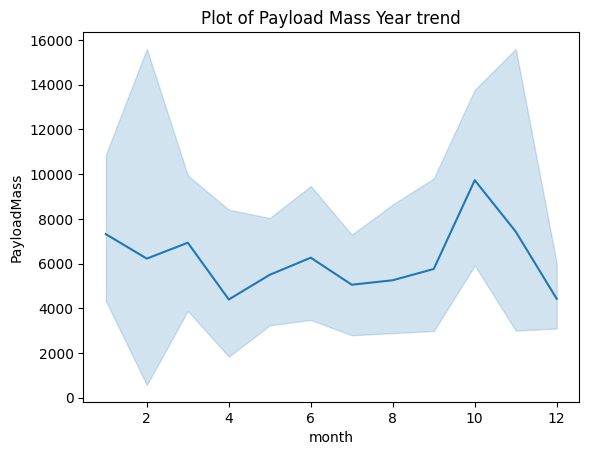

In [83]:
#INSERTA AQUI TU CÓDIGO
df["month"] = pd.DatetimeIndex(df["Date"]).month
sns.lineplot(data=df, x='month', y='PayloadMass')
plt.title('Plot of Payload Mass Year trend');
plt.show()

### Ejercicio 7 : Visualización de la probabilidad de éxito con el tiempo

Realiza un gráfico de linea que muestre como ha evolucionado la prbabilidad de éxito con el tiempo:

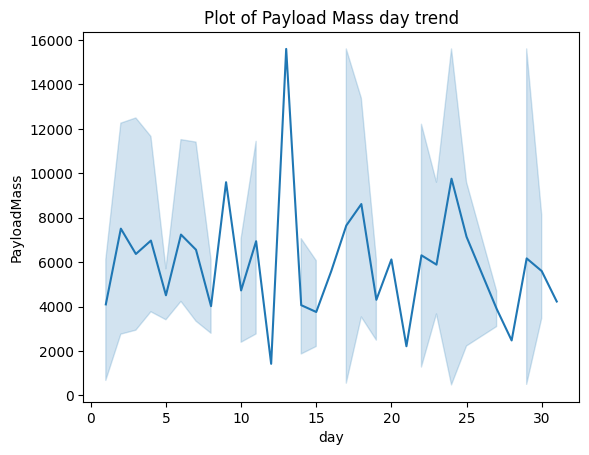

In [82]:
#INSERTA AQUÍ TU CÓDIGO
df["day"] = pd.DatetimeIndex(df["Date"]).day
sns.lineplot(data=df, x='day', y='PayloadMass')
plt.title('Plot of Payload Mass day trend');
plt.show()

**Conclusión: Si recordamos algo de la práctica 2 la probabilidad de éxito que obtuvimos en ese momento fue de un 0.66. Si nos preguntasen ahora la probabilidad de éxito nuestra predicción seguramente fuese algo mayor viendo como ha ido mejorando año tras año. La ciencia de datos es lo que nos permite realizar este tipo de afirmaciones con fundamento y cuanto más sepamos mejor será nuestra predicción. En el siguiente curso se verán diferentes métodos de machine learning para realizar predicciones. Ahí podremos afirmar con precisión cual será la probabilidad de éxito y cual será la proabilidad de que fallemos nuestra predicción.**